<a href="https://colab.research.google.com/github/MarcSole08/2023_Intro_Python/blob/main/W3_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Hurricane Track Analysis

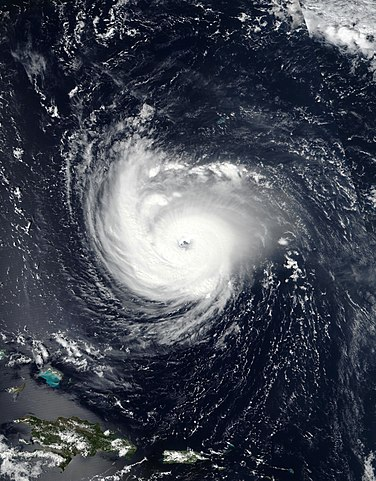

*Can you quickly find out which US states hurricane Florence passed through using `GeoPandas`?*

Image source: [NASA Worldview](https://worldview.earthdata.nasa.gov/)

```{tip} Installing GeoPandas

Please run the following code blocks in this section to:
* Install the GeoPandas's dependencies and GeoPandas
* Download and unzip the data used in this notebook
* Import GeoPandas and other required modules for the notebook
```

In [1]:
#Install the GeoPandas's dependencies
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 7.0 MB/s eta 0:00:00


In [2]:
#Install the GeoPandas

!pip install --upgrade geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.0 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.13.2
    Uninstalling geopandas-0.13.2:
      Successfully uninstalled geopandas-0.13.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [3]:
#Download the data used in this notebook
!gdown 1b1lngOIvuNnZxepbT8RyV3KX1itRky5z

Downloading...
From: https://drive.google.com/uc?id=1b1lngOIvuNnZxepbT8RyV3KX1itRky5z
To: /content/data.zip
100% 25.8M/25.8M [00:00<00:00, 65.0MB/s]


In [4]:
#Unzip the data used in this notebook
!unzip '/content/data.zip'

Archive:  /content/data.zip
   creating: data/
   creating: data/damselfish-data/
 extracting: data/damselfish-data/DAMSELFISH_distributions.cpg  
  inflating: data/damselfish-data/DAMSELFISH_distributions.dbf  
  inflating: data/damselfish-data/DAMSELFISH_distributions.prj  
  inflating: data/damselfish-data/DAMSELFISH_distributions.shp  
  inflating: data/damselfish-data/DAMSELFISH_distributions.shx  
 extracting: data/damselfish-data/DAMSELFISH_distributions_SELECTION.cpg  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.dbf  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.prj  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.shp  
  inflating: data/damselfish-data/DAMSELFISH_distributions_SELECTION.shx  
   creating: data/Europe_borders/
 extracting: data/Europe_borders/Europe_borders.CPG  
  inflating: data/Europe_borders/Europe_borders.dbf  
  inflating: data/Europe_borders/Europe_borders.prj  
  inflating: data/Euro





References:    
1. Geopandas official website: Introduction to GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automating GIS process
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Use Data for Earth and Environmental Science in Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. The Shapely User Manual
https://shapely.readthedocs.io/en/stable/manual.html
5. Geospatial Analysis with Python and R
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction to Geospatial Data in Python
https://www.datacamp.com/tutorial/geospatial-data-python

**Exercise's Instructions**

* Apply GeoPandas to read in the geospatial data, plot, and analyse the track of Hurricane Florence from August 30th to September 18th 2018.
* Please replace ____ with your codes.

## Q1) import geopandas, pandas

In [5]:
#Import GeoPandas and other required modules for the notebook
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Q2) Read a Shapefile with GeoPandas's read_file function

In [6]:
# Read data with the geopandas function
path = r"/content/data/hurricane-data/gz_2010_us_040_00_5m.json"
country = gpd.read_file(path)

## Q3) Have a look at the data, what type of geometries does the data contain?

In [7]:
# The method to see the first few lines of the datra
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


## Q4) Have a look at the data on a map using GeoPandas's .plot() method. Exclude Alaska and Hawaii by the attribute 'NAME' and Pandas's .isin() method. Specify the figsize to be 30 x 20.

<Axes: >

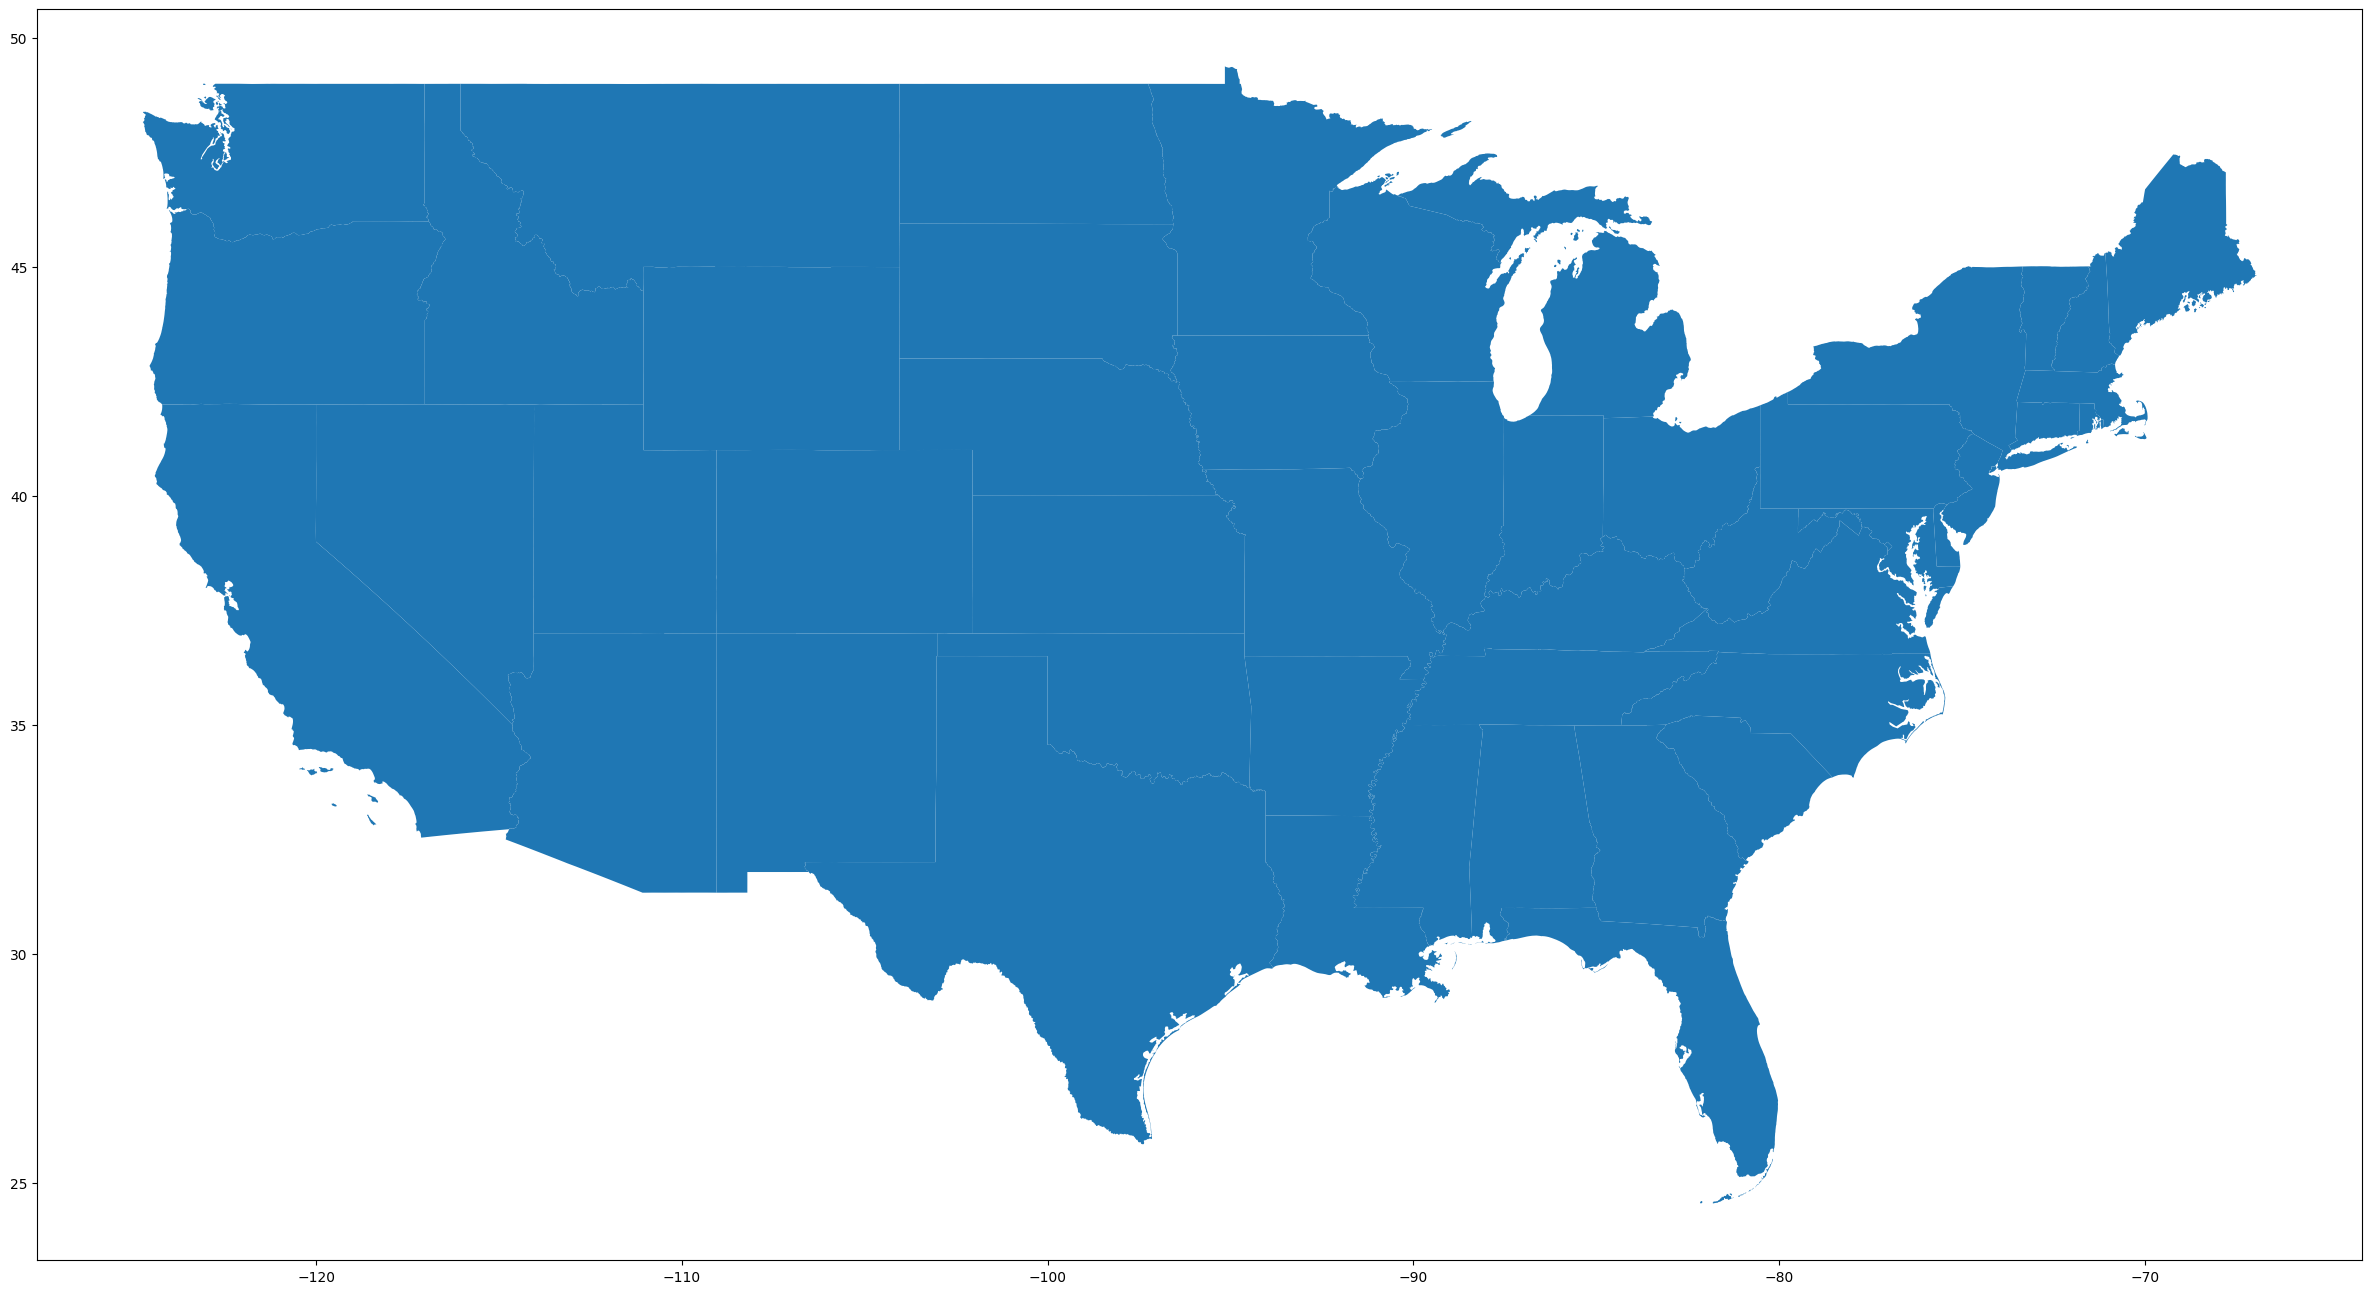

In [8]:
# Plot the US states (Alaska and Hawaii excluded)
country[country['NAME'].isin(['Alaska','Hawaii','Puerto Rico']) == False].plot(figsize=(30,20))

In [9]:
# Read in the hurricane florence data, change the longitude, and have a look at the hurricane florence dataframe
path = r"/content/data/hurricane-data/florence.csv"
florence = pd.read_csv(path)
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence['Long'] = 0 - florence['Long']
florence.head(3)

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six


## Q5) Create a GeoDataFrame from florence DataFrame

In [10]:
# Create a geodataframe from the hurricane florence dataframe
gdf_florence = gpd.GeoDataFrame(florence, geometry=gpd.points_from_xy(florence.Long, florence.Lat))

In [11]:
# Have a look at the hurricane geodataframe
gdf_florence.head(2)

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,geometry
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)


## Q6) Plot the US states map (without Alaska, Hawaii) and hurricane florence together

<Axes: >

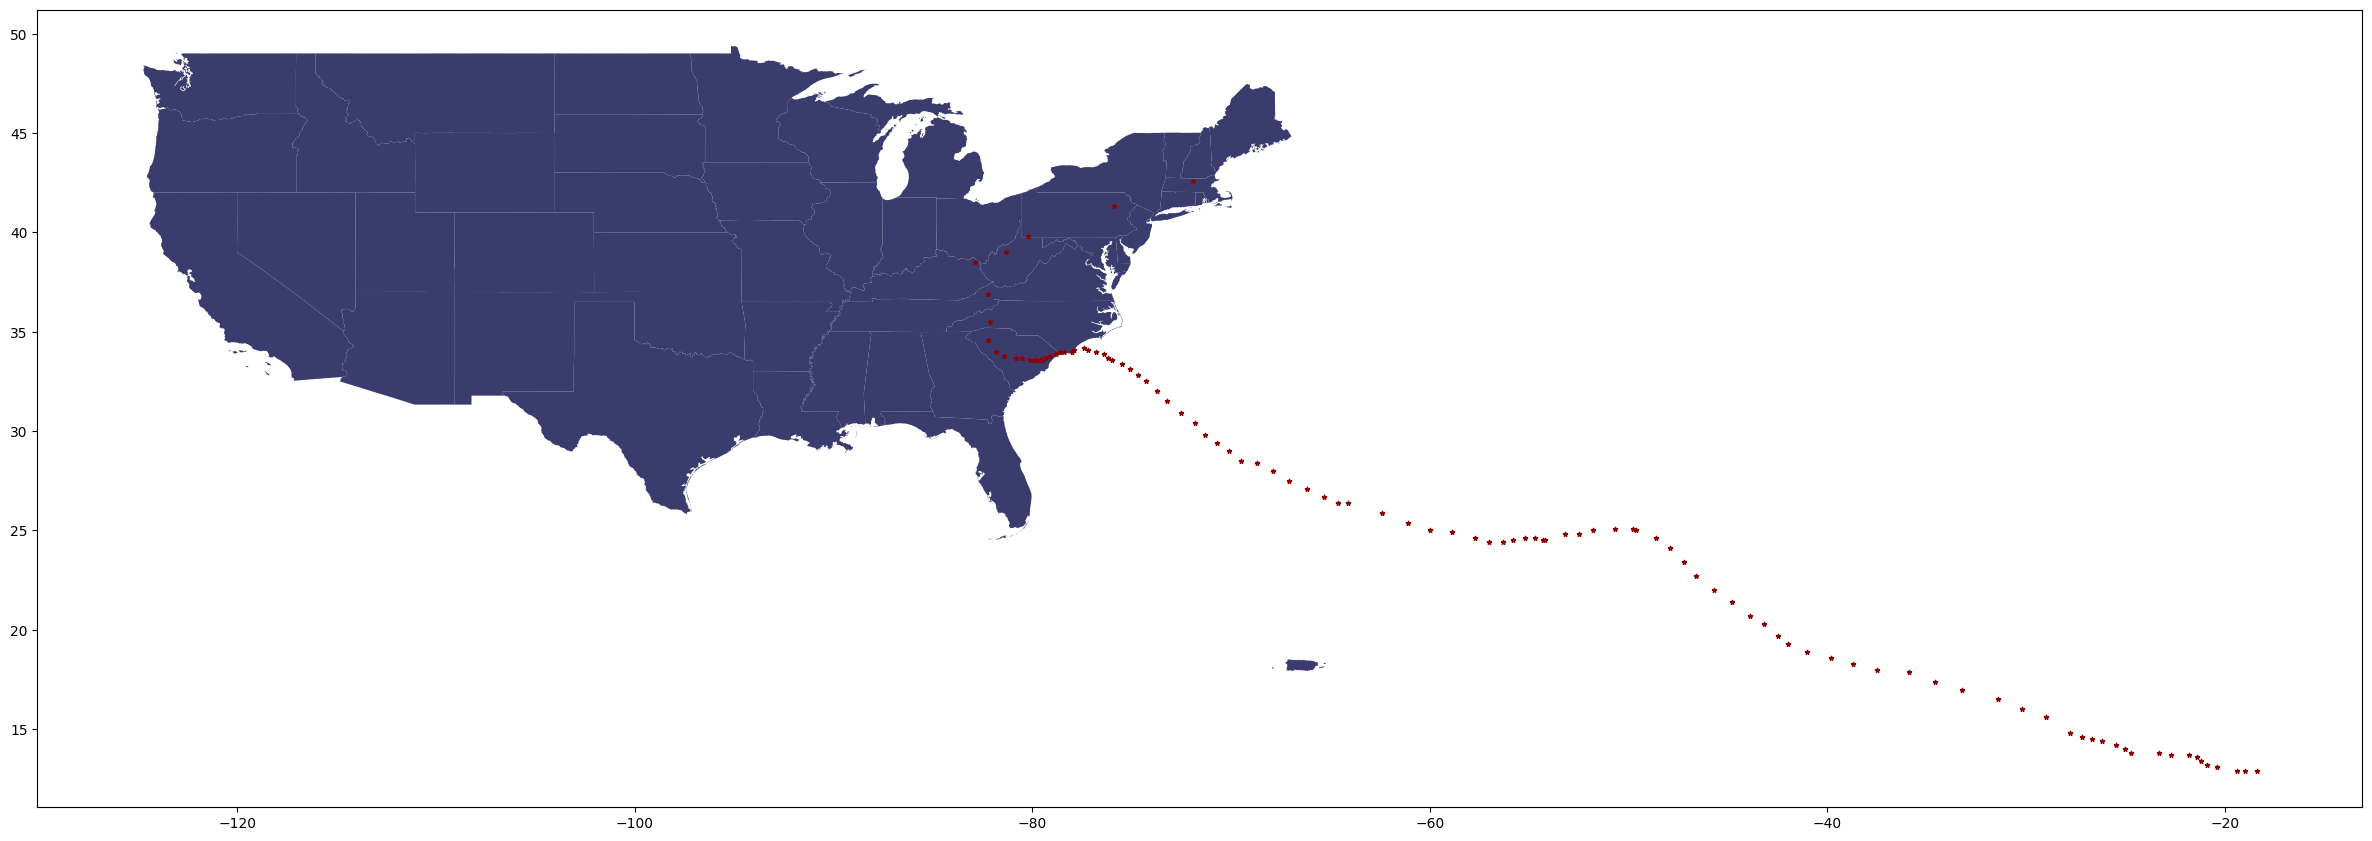

In [12]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Hawaii','Alaska']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
gdf_florence.plot(ax=base, color='darkred', marker="*", markersize=10)

## Q7) What's the coordinate reference system of the data?

In [13]:
# Check the coordinate reference system of the geodataframe
country.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Q8) Which states are passed by the hurricane?

```{hint}
One approach may be plot and see the trajectory of the hurricane on the US map. Other approaches are more than welcome.
```

<Axes: >

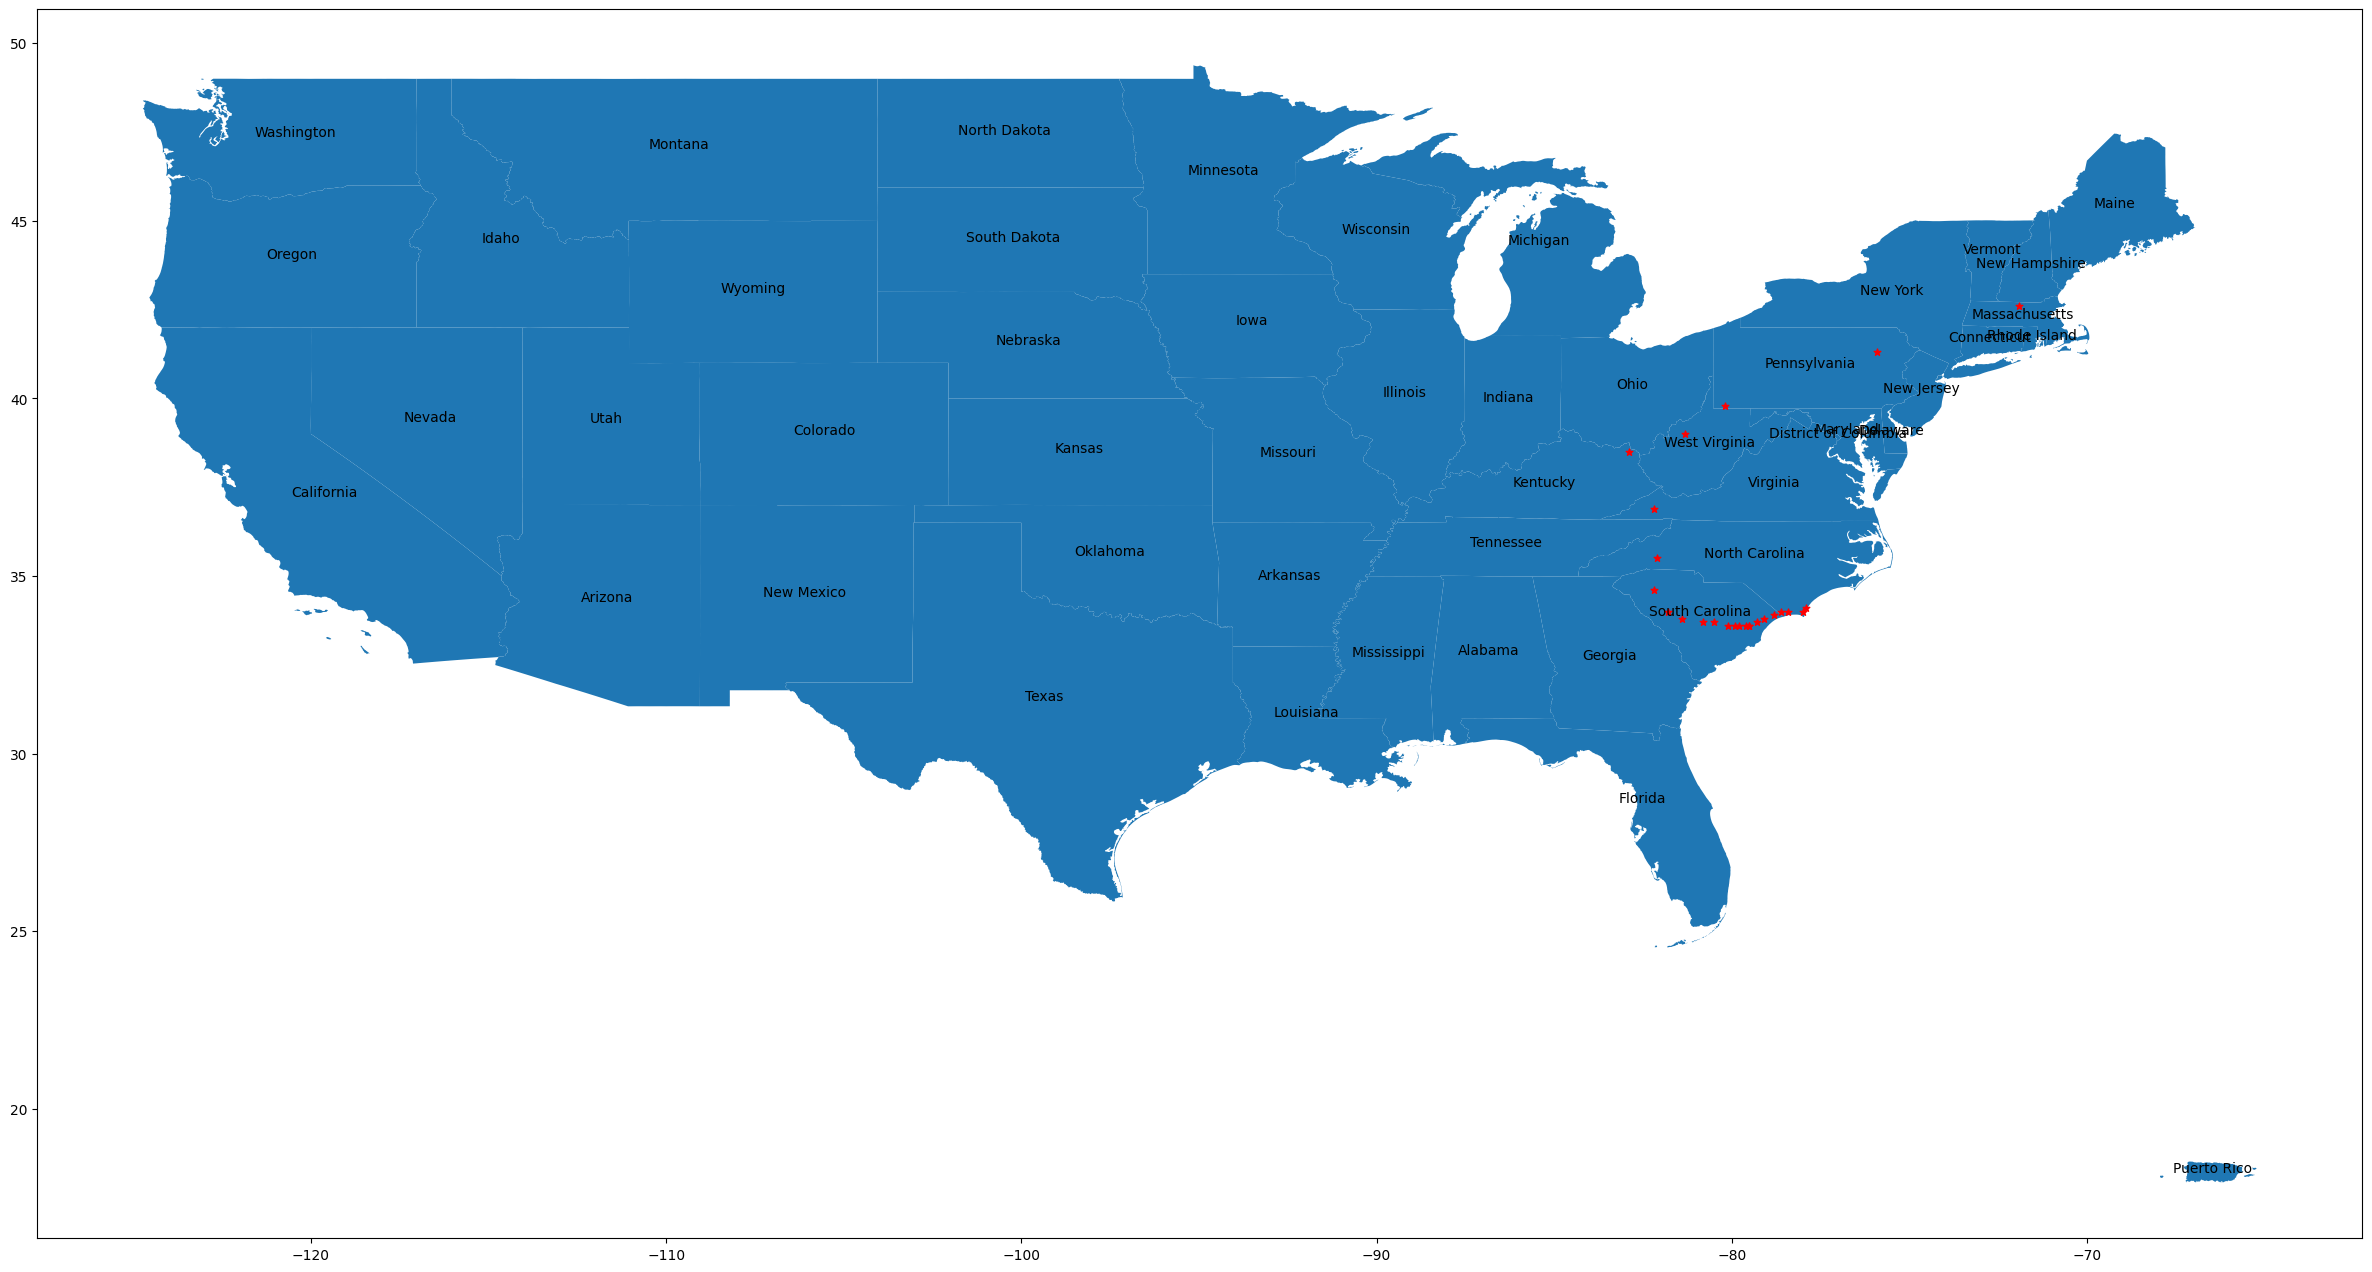

In [16]:
from pandas._config.config import reset_option
# Plot the US states without Alaska and Hawaii
df = country[country['NAME'].isin(['Hawaii','Alaska']) == False]
ax = df.plot(figsize=(30,20))
#  Annotate the US states with their names
df.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# Select the hurricane trajectory points inside the US boundary with the overlay operation
res_intersection = gdf_florence.overlay(country, how='intersection')
# Plot the hurricane trajectory inside US boundary
res_intersection.plot(ax=ax, color='red', marker="*", markersize=25)
